
#    Deep Learning Course 2019
######  Lecturer: Assistant prof. Siamak Mehrkanoon
####  =====================================================================================================

## Assignment-1:

### Download the Iris data and explore it, (visualize it, how many classes, instances, features, etc)
### Select feature number 0 and 2 and the first 100 samples and do the following analysis: 

### 1) Implement the logistic regression model that discussed in the class (with and without regularization). Use Gradient descent algorithm for updating the parameters. Plot the results.

### 2) Explore the influence of learning rate on the convergence of the model. Tune the learning rate.

### 3) Repeat steps 1-4 for different randomly selected features (e.g. 1 and 3 or 2 and 3) and compare the results.

### 4) Give the option to the users to select whatever combination of features they want and your code will do the rest.

### 5)  Try your model on Monk2 dataset and report the results, (test accuracy, training accuracy, optimal learning rate, loss value). Use the last 20% of the data as test.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()
df = df[:100]
classes = df[4].unique()

# Normalize the date
samples = df.copy()
samples[4][samples[4] == classes[0]] = 0
samples[4][samples[4] == classes[1]] = 1
samples = preprocessing.MinMaxScaler().fit_transform(samples)
#samples = preprocessing.scale(samples)
#forwardPass(df[0])
#print(samples)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Looking at the dataset and having a look at how many classes and min max of each features. Have a look whether there are missing values. If so, how do I fill them up? How many samples do we have?

In [3]:
print(f'Number of samples: {len(df)}')
print(f'Classes: {classes}')
print(f'First Feature  min: {np.min(df[0])} max: {np.max(df[0])} mean: {np.mean(df[0]):.2f} median: {np.median(df[0])} Std: {np.std(df[0]):.2f}')
print(f'Second Feature min: {np.min(df[1])} max: {np.max(df[1])} mean: {np.mean(df[1]):.2f} median: {np.median(df[1])} Std: {np.std(df[1]):.2f}')
print(f'Third Feature  min: {np.min(df[2])} max: {np.max(df[2])} mean: {np.mean(df[2]):.2f} median: {np.median(df[2])} Std: {np.std(df[2]):.2f}')
print(f'Fourth Feature min: {np.min(df[3])} max: {np.max(df[3])} mean: {np.mean(df[3]):.2f} median: {np.median(df[3])} Std: {np.std(df[3]):.2f}')
# TODO: check for missing values

Number of samples: 100
Classes: ['Iris-setosa' 'Iris-versicolor']
First Feature  min: 4.3 max: 7.0 mean: 5.47 median: 5.4 Std: 0.64
Second Feature min: 2.0 max: 4.4 mean: 3.09 median: 3.05 Std: 0.47
Third Feature  min: 1.0 max: 5.1 mean: 2.86 median: 2.45 Std: 1.44
Fourth Feature min: 0.1 max: 1.8 mean: 0.78 median: 0.8 Std: 0.56


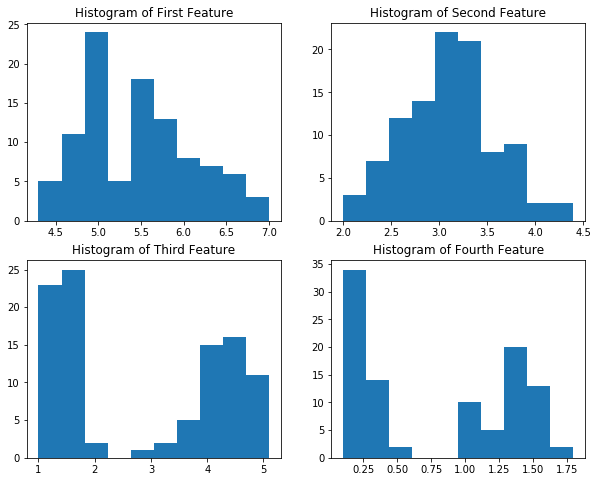

In [4]:
fig = plt.figure(figsize=(10,8))

plt.subplot(221)
plt.hist(df[0])
plt.title('Histogram of First Feature')
plt.subplot(222)
plt.hist(df[1])
plt.title('Histogram of Second Feature')
plt.subplot(223)
plt.hist(df[2])
plt.title('Histogram of Third Feature')
plt.subplot(224)
plt.hist(df[3])
plt.title('Histogram of Fourth Feature')
plt.show()

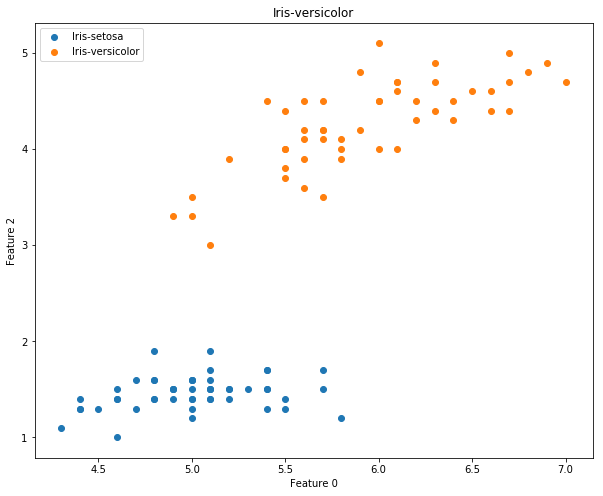

In [5]:
plt.figure(figsize=(10,8))
for i, c in enumerate(classes):
    #plt.subplot(1,3,i+1)
    plt.title(c)
    plt.scatter(df[df[4] == c][0], df[df[4] == c][2], label=c)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 2')
    plt.legend()

plt.show()

The neural network consists of 2 input neurons (since we have 2 features as input) and one neuron in the hidden layer connected to the output layer with 1 neuron.

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def derivedSigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [305]:
class NN:
    # weight initialization is in range -4*sqrt(6/numNeuronsInLayer) and +4*sqrt(6/numNeuronsInLayer)
    weights1 = np.random.uniform(-4*np.sqrt(6.0/4), 4*np.sqrt(6.0/4), size=(3, 1))
    weights2 = np.random.uniform(-4*np.sqrt(6.0/3), 4*np.sqrt(6.0/3), size=(2, 1))
    
    
    def __init__(self, learning_rate, epochs, regularization, regularizationTerm):
        self.learning_rate = learning_rate
        self.regularization = regularization
        self.lamReg = regularizationTerm
        self.maxEpochs = epochs
        self.errors = []

    def forwardPass(self, x):
        if len(x.shape) == 1:
            x = x.reshape(-1, 1)
        
        # adding bias
        self.inp = np.hstack((np.ones((len(x), 1)), x))
        self.hiddenActivation = sigmoid(np.dot(self.inp, self.weights1))
        # adding bias
        self.hiddenOut = np.hstack((np.ones((len(x), 1)), self.hiddenActivation))
        self.prediction = sigmoid(np.dot(self.hiddenOut, self.weights2))
        return self.prediction
    
    
    def train(self,data):
        samples = data[:, :2]
        targets = data[:, 2]
        
        epochs = 0
        converged = False        
        while not converged:
            epochs += 1
            totalError = 0.0
            samples = np.random.permutation(samples)
            for i, sample in enumerate(samples):
                sample = np.expand_dims(sample, axis=0)
                pred = self.forwardPass(sample)
                cost = self.costFunction(pred, targets[i])  
                
                # backpropagate
#                 delta2 = np.dot(self.costFunction(pred, targets[i], derived=True), self.hiddenActivation)
#                 print(delta2.shape)
#                 delta1 = np.dot(delta2*weights2)
#                 print(delta1.shape)
                delta2 = self.costFunction(pred, targets[i], derived=True) * derivedSigmoid(self.hiddenOut) * self.hiddenActivation
                delta1 = np.dot(np.dot(delta2, weights2), derivedSigmoid(self.inp))

                delta1 = delta1.T
                delta2 = delta2.T
                # update weights
                regTermW2 = self.lamReg/2 *np.sum(weights2)**2 if self.regularization else 0
                regTermW1 = self.lamReg/2 *np.sum(weights1)**2 if self.regularization else 0
                # bias does not get regularized
                self.weights2[0] -= self.learning_rate * delta2[0]
                self.weights1[0] -= self.learning_rate * delta1[0]
                self.weights2[1:] -= self.learning_rate * (delta2[1:] + regTermW2)
                self.weights1[1:] -= self.learning_rate * (delta1[1:] + regTermW1)
                
                totalError += np.sum(delta2)
                totalError += np.sum(delta1)
            # totalError += error
            
            self.errors.append(totalError)
            if epochs%100 == 0:
                print(f'Error in epoch {epochs}: {totalError}')
            if self.maxEpochs != 0:
                if epochs >= self.maxEpochs:
                    break
            if np.abs(totalError) < 0.005:
                converged = True
        print(f'Converged after {epochs} epochs.')
        

    def costFunction(self, pred, target, derived=False):
        # print(f'pred.shape {pred.shape} target.shape {target.shape}')
        # np.log(0) == -inf
        if not derived:
            if pred == 0.0:
                if target == 0:
                    cost = 0
                else:
                    print("Target 1 and prediction 0 far apart")
                    cost = 25
            elif pred == 1.0:
                if target == 1.0:
                    cost = 0
                else:
                    print("Target 0 and prediction 1 far apart")
                    cost = 25
            else:
                cost = -target*np.log(pred)-(1-target)*np.log(1-pred)
        else:
            cost = -target-pred
#         if not derived:
#             cost = 0.5*(target-pred)**2
#         else:
#             cost = -(target-pred)
        return cost


In [311]:
# Putting these in vector shapes
nn = NN(learning_rate = 0.1, epochs=0, regularization=False, regularizationTerm=1)

nn.train(data)


Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 far apart
Target 0 and prediction 1 fa

KeyboardInterrupt: 

In [294]:
# only use features 0 and 2
data = np.delete(samples, [1, 3], axis=1)
# print(data)
data = np.random.permutation(data)
data_train = data[:int(0.8*len(data))]
data_test = data[int(0.8*len(data))]

In [296]:
nn2 = NN(learning_rate = 0.001, epochs=0, regularization=True, regularizationTerm=0.005)

nn2.train(data_train)

Error in epoch 100: 9.025726142154713
Error in epoch 200: 8.02752338977154
Error in epoch 300: 8.281067007610954
Error in epoch 400: 7.815980272616371
Error in epoch 500: 7.14261990219501
Error in epoch 600: 6.84546572631055
Error in epoch 700: 7.57791094125371
Error in epoch 800: 6.414602634868149
Error in epoch 900: 6.4103093021171755
Error in epoch 1000: 6.017508995461378
Error in epoch 1100: 5.2873028569421665
Error in epoch 1200: 4.948499325914087
Error in epoch 1300: 5.295461715774949
Error in epoch 1400: 5.021850254293597
Error in epoch 1500: 4.6906115714588
Error in epoch 1600: 4.927743392681287
Error in epoch 1700: 4.254884251131576
Error in epoch 1800: 3.7940271605353026
Error in epoch 1900: 4.074047859334302
Error in epoch 2000: 3.866638367217228
Error in epoch 2100: 3.6337465414351557
Error in epoch 2200: 3.3088592307938414
Error in epoch 2300: 3.7059186605204646
Error in epoch 2400: 3.6289839485316433
Error in epoch 2500: 3.407765036285037
Error in epoch 2600: 3.2230502227

KeyboardInterrupt: 

In [272]:
n = 6
print(np.expand_dims(data[n, :2], axis=0))
print(f'predicted {nn.forwardPass(np.expand_dims(data[n, :2], axis=0))} target {data[n, 2]}')

# TODO look at weights --> are they huge?
# what if regularization is used?

[[0.11111111 0.09756098]]
predicted [[3.42545038e-26]] target 0.0


## Part 2

In [ ]:
import scipy.io as sio
monk2 = sio.loadmat('monk2.mat')['monk2']
print(monk2)